### Data analysis of the Enron dataset
##### to be used as input for the machine learning algorithm

Questions to answer?
- total number of data points
- allocation accross classes (poi/non-poi)
- number of features used
- features with missing values

Additional steps:
- identify outliers
- implement new features

In [3]:
#load modules
import pickle
import pandas as pd
import numpy as np
from pprint import pprint

#visualization
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline


In [4]:
#import the data
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

#converting to panda
data_list = []
for person, data in data_dict.items():
    data['person'] = person
    data_list.append(data)
df = pd.DataFrame(data_list)

In [5]:
#total number of data points
#number of features used
df.shape

(146, 22)

In [6]:
df.describe(include='all')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,person,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,42,40,45,18,112,102,95,65,58,42,...,93,146,2,98,19,95,84,87,126,125
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,PRENTICE JAMES,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,107,97,129,35,44,51,60,60,60,...,53,1,128,36,128,51,60,60,21,20


In [7]:
#allocation across classes
df['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [8]:
df.dtypes

bonus                        object
deferral_payments            object
deferred_income              object
director_fees                object
email_address                object
exercised_stock_options      object
expenses                     object
from_messages                object
from_poi_to_this_person      object
from_this_person_to_poi      object
loan_advances                object
long_term_incentive          object
other                        object
person                       object
poi                            bool
restricted_stock             object
restricted_stock_deferred    object
salary                       object
shared_receipt_with_poi      object
to_messages                  object
total_payments               object
total_stock_value            object
dtype: object

There seems to have a lot of null variables in the dataset, which is already small (only 146 observations and 22 variables). Out of these observations, 18 are classified as Persons of Interest and 128 not. 

Lots of features have missing values, so we should take a closer look at the NAs. During this process I will also force the conversion of numerical features to numeric, since as of now they are being considered objects. This step will transform the strings 'NA' to the actual nan value, and help count the nans.

In [9]:
#converting features to numerical
df = df.convert_objects(convert_numeric=True)

#features with missing values
nans_count = dict(df.isnull().sum())
nans_percentage = {k:v/148.0 for k,v in nans_count.items()}
pprint(sorted(nans_percentage.items(), key=lambda x:-x[1]))

[('loan_advances', 0.95945945945945943),
 ('director_fees', 0.8716216216216216),
 ('restricted_stock_deferred', 0.86486486486486491),
 ('deferral_payments', 0.72297297297297303),
 ('deferred_income', 0.65540540540540537),
 ('long_term_incentive', 0.54054054054054057),
 ('bonus', 0.43243243243243246),
 ('to_messages', 0.40540540540540543),
 ('shared_receipt_with_poi', 0.40540540540540543),
 ('from_messages', 0.40540540540540543),
 ('from_poi_to_this_person', 0.40540540540540543),
 ('from_this_person_to_poi', 0.40540540540540543),
 ('other', 0.35810810810810811),
 ('expenses', 0.34459459459459457),
 ('salary', 0.34459459459459457),
 ('exercised_stock_options', 0.29729729729729731),
 ('restricted_stock', 0.24324324324324326),
 ('total_payments', 0.14189189189189189),
 ('total_stock_value', 0.13513513513513514),
 ('poi', 0.0),
 ('email_address', 0.0),
 ('person', 0.0)]


/Users/lucasosouza/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from IPython.kernel.zmq import kernelapp as app


There are a lot of Nan Values. Some of the variables might not be of use due to the high number of nan's. We will better evaluate it runningsome correlation tests between the variables

In [10]:
df.corr()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.978808,-0.980138,NaN,0.990518,0.989117,0.052725,0.562187,0.354634,0.640266,0.995012,0.961757,-0.013837,0.985062,-0.975080,0.993425,0.549102,0.372997,0.963154,0.990202
deferral_payments,0.978808,1.000000,-0.994974,1.000000,0.960891,0.973234,0.321947,0.424101,0.206993,0.356130,0.971950,0.958584,-0.084502,0.970340,-0.996176,0.977846,0.356696,0.310129,0.923344,0.963424
deferred_income,-0.980138,-0.994974,1.000000,-0.995729,-0.977234,-0.970539,-0.319995,-0.178951,-0.271673,-0.433300,-0.982358,-0.945725,0.014201,-0.971404,0.973253,-0.977737,-0.394677,-0.350815,-0.925775,-0.975203
director_fees,NaN,1.000000,-0.995729,1.000000,0.996597,0.995207,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,0.999011,-0.565314,NaN,1.000000,-1.000000,0.994356,0.997112
exercised_stock_options,0.990518,0.960891,-0.977234,0.996597,1.000000,0.983227,-0.066129,0.160253,-0.030101,0.665824,0.990516,0.967541,0.052886,0.991501,-0.475566,0.992739,0.154333,0.079568,0.965020,0.998869
expenses,0.989117,0.973234,-0.970539,0.995207,0.983227,1.000000,0.094144,-0.059244,0.014964,0.600193,0.988083,0.953230,-0.044508,0.982824,-0.976320,0.995945,0.223495,0.155070,0.946242,0.984372
from_messages,0.052725,0.321947,-0.319995,1.000000,-0.066129,0.094144,1.000000,0.186708,0.588687,-0.213768,-0.071958,-0.101686,-0.074308,0.003145,-0.326671,-0.003541,0.230855,0.475450,-0.033089,-0.036310
from_poi_to_this_person,0.562187,0.424101,-0.178951,NaN,0.160253,-0.059244,0.186708,1.000000,0.445063,0.009878,0.212538,0.111249,0.167722,0.133594,-0.455876,0.179055,0.659264,0.525667,0.154431,0.146366
from_this_person_to_poi,0.354634,0.206993,-0.271673,1.000000,-0.030101,0.014964,0.588687,0.445063,1.000000,0.934835,0.083591,-0.110335,0.112940,0.049284,-0.398550,0.021288,0.475748,0.568506,0.011556,0.001289
loan_advances,0.640266,0.356130,-0.433300,NaN,0.665824,0.600193,-0.213768,0.009878,0.934835,1.000000,0.553638,0.584598,0.560178,0.585069,NaN,0.600576,0.291501,0.739805,0.816098,0.667922


Seems that there a lot of features highly correlated, let's group them to facilitate further analysis:

##### 1st group - financial information - highly correlated (0.95 to 0.99)
u'bonus', u'deferral_payments', u'deferred_income', u'exercised_stock_options', u'expenses', u'long_term_incentive', u'other', u'restricted_stock', u'salary', u'total_payments', u'total_stock_value'

##### 2nd group - messages - correlated (0.2 - 0.7)
u'shared_receipt_with_poi', u'from_messages', u'from_poi_to_this_person', u'from_this_person_to_poi',  u'to_messages'

##### 3rd group - weird behaviors, not enough data to evaluate, mostly nans.
u'loan_advances' (4) ,  u'director_fees'(17), u'restricted_stock_deferred'(18)

We should be in guard for outliers that can affect the result of the classifier. Before passing the info to the classifier, let's look for outliers, by seeing the value distribution of the variables.

In [11]:
#value distribution
df.describe(include='all')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,person,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,146,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,...,9.300000e+01,146,146,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
unique,NaN,NaN,NaN,NaN,112,NaN,NaN,NaN,NaN,NaN,...,NaN,146,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,PRENTICE JAMES,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,...,NaN,1,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,NaN,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,...,9.190650e+05,NaN,NaN,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,NaN,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,...,4.589253e+06,NaN,NaN,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,NaN,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,...,2.000000e+00,NaN,NaN,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,NaN,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,...,1.215000e+03,NaN,NaN,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,NaN,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,...,5.238200e+04,NaN,NaN,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,NaN,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,...,3.620960e+05,NaN,NaN,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06


This table shows an overall view of the data. There are too many variables to plot all of them, but we can try a faster approach. Let's look at the max value/75% value to see the diference between the max value and the upper boundary of the interquartile range:


In [12]:
features = ['bonus', 'deferral_payments', 'deferred_income','exercised_stock_options', 
            'expenses', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 
            'total_payments', 'total_stock_value', 'shared_receipt_with_poi', 'from_messages', 
            'from_poi_to_this_person', 'from_this_person_to_poi',  'to_messages']

df[features].max() / df[features].quantile(.75)

bonus                       81.119682
deferral_payments           31.997914
deferred_income              0.021723
exercised_stock_options    122.369613
expenses                    65.478853
long_term_incentive         51.692101
other                      117.835019
restricted_stock           130.014198
salary                      85.558393
total_payments             148.039967
total_stock_value          147.299012
shared_receipt_with_poi      2.923871
from_messages               98.749141
from_poi_to_this_person      7.307958
from_this_person_to_poi     24.606061
to_messages                  5.749692
dtype: float64

The analysis shows there a few variables which have a much max than upper boundary if IQR: bonus, exercised_stock_options, restricted_stock, total_payments, total_stock_values, from_messages, and other (other meaning other sources of income). 

First, let's see who holds the maximum and minimum value for each variable too see if we can find any abnormality:



In [13]:
#for feature in features:
#    df[feature].idxmax

In [14]:
#Let's plot a histogram for each of these variables:

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


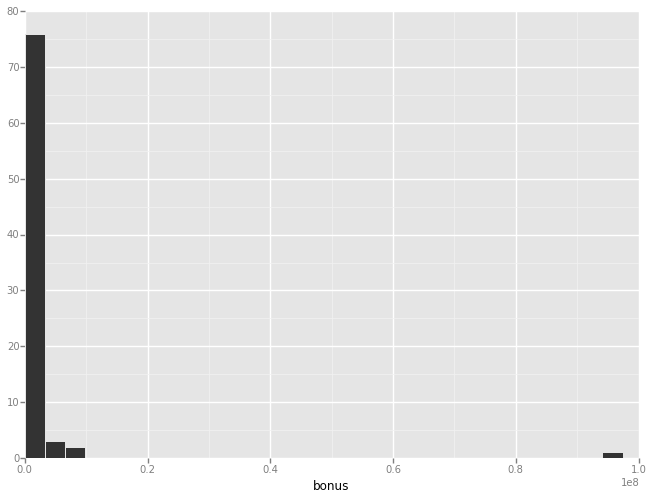

<ggplot: (275489805)>

In [15]:
ggplot(df, aes(x='bonus')) + geom_histogram()

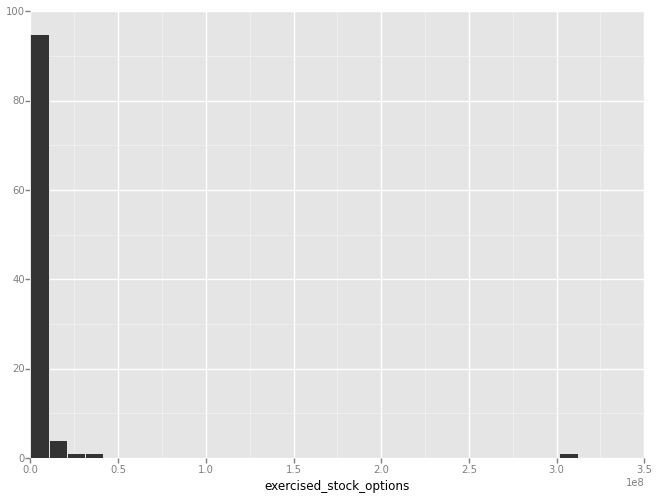

<ggplot: (281460345)>

In [16]:
ggplot(df, aes(x='exercised_stock_options')) + geom_histogram()

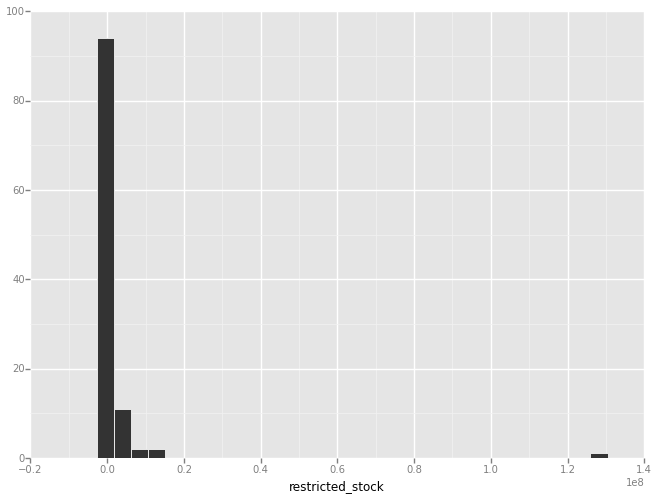

<ggplot: (271262493)>

In [17]:
ggplot(df, aes(x='restricted_stock')) + geom_histogram()

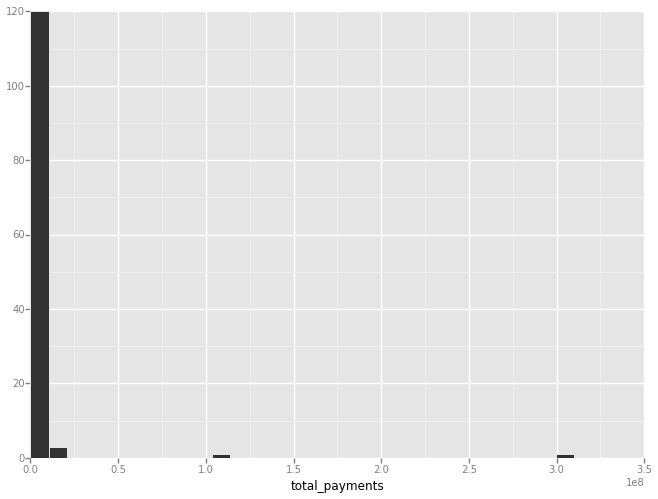

<ggplot: (281510845)>

In [18]:
ggplot(df, aes(x='total_payments')) + geom_histogram()

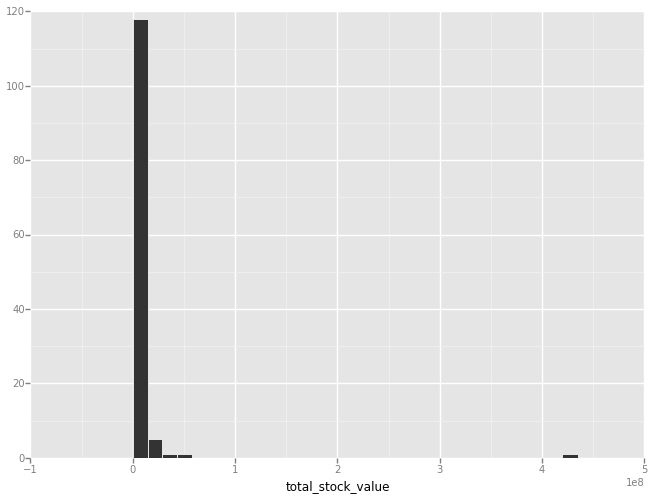

<ggplot: (282317917)>

In [19]:
ggplot(df, aes(x='total_stock_value')) + geom_histogram()

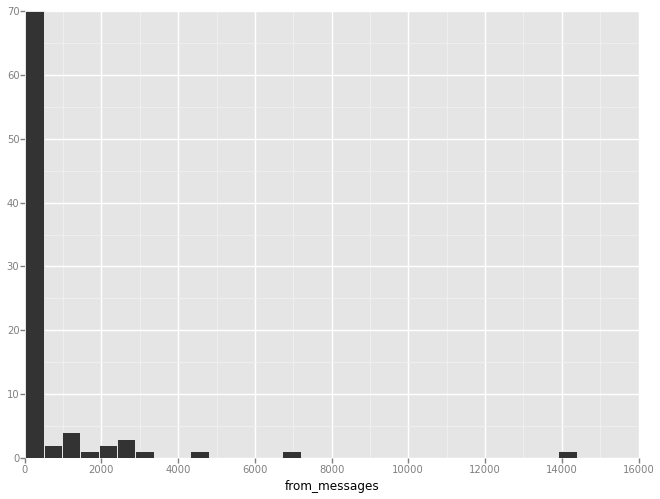

<ggplot: (282053413)>

In [20]:
ggplot(df, aes(x='from_messages')) + geom_histogram()

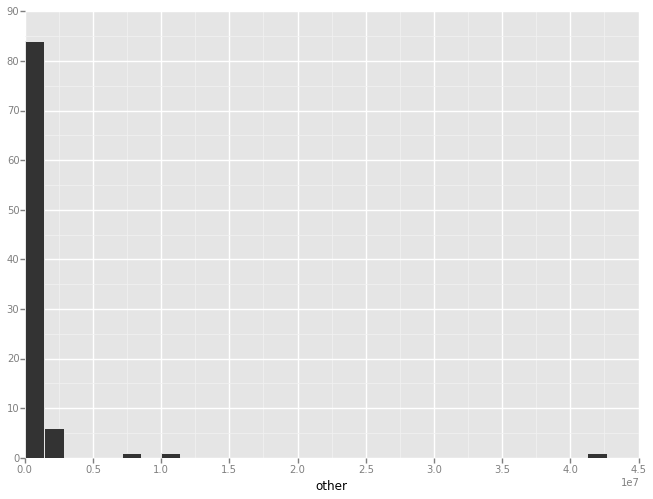

<ggplot: (271262673)>

In [21]:
ggplot(df, aes(x='other')) + geom_histogram()

One interesting thing we can see from the features is that all variables have an outlier which is very far off the other.

In [22]:
#get max
df.iloc[df['other'].idxmax()]

bonus                        9.73436e+07
deferral_payments            3.20834e+07
deferred_income             -2.79929e+07
director_fees                1.39852e+06
email_address                        NaN
exercised_stock_options      3.11764e+08
expenses                      5.2352e+06
from_messages                        NaN
from_poi_to_this_person              NaN
from_this_person_to_poi              NaN
loan_advances                 8.3925e+07
long_term_incentive          4.85219e+07
other                        4.26676e+07
person                             TOTAL
poi                                False
restricted_stock             1.30322e+08
restricted_stock_deferred   -7.57679e+06
salary                       2.67042e+07
shared_receipt_with_poi              NaN
to_messages                          NaN
total_payments               3.09887e+08
total_stock_value             4.3451e+08
Name: 104, dtype: object

In [23]:
#removing from the dataset
df = df[df.person != 'TOTAL']

#looking for outliers again
abs(df[features].max()) / abs(df[features].quantile(.75))

bonus                       6.666667
deferral_payments           7.411101
deferred_income             0.021964
exercised_stock_options    13.508026
expenses                    2.917579
long_term_incentive         6.185836
other                      28.972003
restricted_stock           14.986005
salary                      3.600890
total_payments             49.677001
total_stock_value          18.839487
shared_receipt_with_poi     2.923871
from_messages              98.749141
from_poi_to_this_person     7.307958
from_this_person_to_poi    24.606061
to_messages                 5.749692
dtype: float64

In [24]:
df.iloc[df['total_payments'].idxmax()]

bonus                                        7e+06
deferral_payments                           202911
deferred_income                            -300000
director_fees                                  NaN
email_address                kenneth.lay@enron.com
exercised_stock_options                3.43484e+07
expenses                                     99832
from_messages                                   36
from_poi_to_this_person                        123
from_this_person_to_poi                         16
loan_advances                           8.1525e+07
long_term_incentive                        3.6e+06
other                                  1.03597e+07
person                               LAY KENNETH L
poi                                           True
restricted_stock                       1.47617e+07
restricted_stock_deferred                      NaN
salary                                 1.07232e+06
shared_receipt_with_poi                       2411
to_messages                    

In [25]:
df.iloc[df['from_messages'].idxmax()]

bonus                                          400000
deferral_payments                                 NaN
deferred_income                                   NaN
director_fees                                     NaN
email_address                vince.kaminski@enron.com
exercised_stock_options                        850010
expenses                                        83585
from_messages                                   14368
from_poi_to_this_person                            41
from_this_person_to_poi                           171
loan_advances                                     NaN
long_term_incentive                            323466
other                                            4669
person                            KAMINSKI WINCENTY J
poi                                             False
restricted_stock                               126027
restricted_stock_deferred                         NaN
salary                                         275101
shared_receipt_with_poi     

We have identified the outlier as Total, which have been removed. A few outliers remain, in the variables total_payments and from_messages, but they are indeed employees from Enron and should not be removed from dataset.

### Creating new features
Based on our analysis, we can try to create new features that bring relevant information. One of the things we can check is how much in stock option the potential person of interest exercised divided by their total stock value. Exercising a stock option is something an employee would do if he thought the price of the stock is getting lower in the near future.

Other features we can look is how much of the messages an employee sent are to the person of interest, as well as how much of the received messages are from persons of interst.

Let's create these 3 new features:

In [26]:
df['exercised_stocks_percentage'] = df.exercised_stock_options / df.total_stock_value
df['percentage_messages_from_poi'] = df.from_poi_to_this_person / df.to_messages
df['percentage_messages_to_poi'] = df.from_this_person_to_poi / df.from_messages 


In [27]:
df.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,exercised_stocks_percentage,percentage_messages_from_poi,percentage_messages_to_poi
0,600000.0,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299.0,29.0,38.0,1.0,...,585062.0,NaN,365788.0,702.0,807.0,1061827.0,585062.0,NaN,0.047088,0.034483
1,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,0.628860,NaN,NaN
2,350000.0,NaN,-400729.0,NaN,steven.elliott@enron.com,4890344.0,78552.0,NaN,NaN,NaN,...,1788391.0,NaN,170941.0,NaN,NaN,211725.0,6678735.0,0.732226,NaN,NaN
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850.0,NaN,12.0,10.0,0.0,...,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0,0.627875,0.013089,0.000000
4,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0,0.866522,0.030622,0.656250


In [52]:
df[df.person == 'THE TRAVEL AGENCY IN THE PARK']
df = df[df.person != 'THE TRAVEL AGENCY IN THE PARK']
#101 THE TRAVEL AGENCY IN THE PARK

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,exercised_stocks_percentage,percentage_messages_from_poi,percentage_messages_to_poi
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,362096.0,NaN,NaN,NaN,NaN


There is another outlier, identified by looking at the pdf file. The Travel Agency in the Park is not an Enron employee, hence I've removed it from the dataset.